### Example 1: Plotting a Gaussian

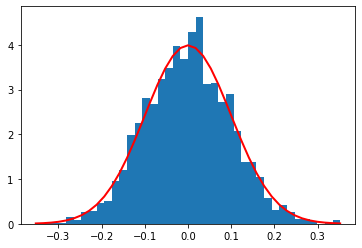

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# mean and standard deviation
mu, sigma = 0, 0.1

# sample from Gaussian (normal) distribution
s = np.random.normal(mu, sigma, 2000)

# split samples into bins
count, bins, ignored = plt.hist(s, 40, density=True)

# plot the bins and Gaussian distribution
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth=2, color='r')
plt.show()

### Example 2a: Plotting a Bivariate Gaussian

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


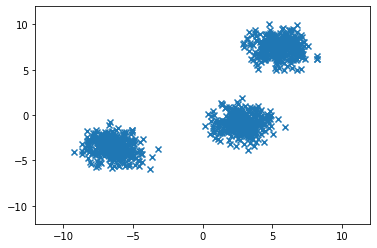

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=3, cluster_std=1)

plt.scatter(X[:,0],X[:,1],marker="x");
plt.axis([-12,12,-12,12]);

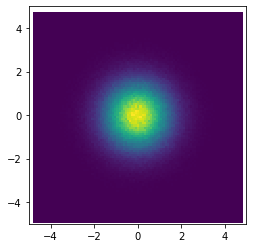

[[1 0]
 [0 1]]
0.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy.random import multivariate_normal

# provide mean and covariance
mean = [0, 0]
cov = np.array([[1, 0], [0, 1]])
#cov = np.array([[5, 0], [0, 5]])
#cov = np.array([[5, 0], [0, 1]])
#cov = np.array([[1, 0.5], [0.5, 1]])
#cov = np.array([[2, -1.9], [-1.9, 2]])

# sample from Gaussian distribution
data = multivariate_normal(mean, cov, size=1000000)

# split samples into bins and plot
plt.hist2d(data[:, 0], data[:, 1], bins=100)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# obtain the correlation
correlation = cov[0,1]/((cov[0,0]**0.5)*(cov[1,1]**0.5))
print(cov)
print(correlation)

### Example 2b: Example from Lecture

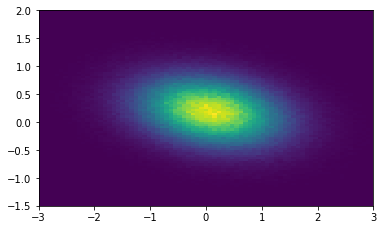

[[ 0.69 -0.08]
 [-0.08  0.16]]
-0.2407717061715384


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy.random import multivariate_normal

mean = [0.1, 0.2]
cov = np.array([[0.69, -0.08], [-0.08, 0.16]])

# sample from Gaussian distribution
data = multivariate_normal(mean, cov, size=1000000)

# split samples into bins and plot
plt.hist2d(data[:, 0], data[:, 1], bins=100)

plt.xlim(-3, 3)
plt.ylim(-1.5, 2)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# calculate the correlation
correlation = cov[0,1]/((cov[0,0]**0.5)*(cov[1,1]**0.5))
print(cov)
print(correlation)

can compare to the scatter plot

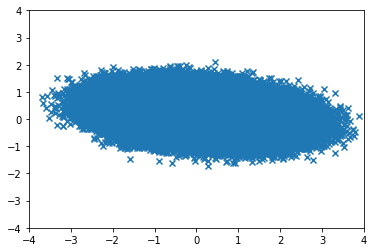

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X = data
plt.scatter(X[:,0],X[:,1],marker="x");
plt.axis([-4,4,-4,4]);

### Example 3: Covariance from Real Data

In [ ]:
df = pd.DataFrame({'Length':[4.0, 4.2, 3.9, 4.3, 4.1], 
                   'Width':[2.0, 2.1, 2.0, 2.1, 2.2], 
                   'Height':[0.60, 0.59, 0.58, 0.62, 0.63]})
df

,Length,Width,Height
0,4.0,2.0,0.60
1,4.2,2.1,0.59
2,3.9,2.0,0.58
3,4.3,2.1,0.62
4,4.1,2.2,0.63


Each row is an observation. See source example [here](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm).

In [ ]:
df_dev = df - df.mean(axis = 0) #Matrix of deviations from the mean
df_dev

,Length,Width,Height
0,-0.1,-0.08,-0.004
1,0.1,0.02,-0.014
2,-0.2,-0.08,-0.024
3,0.2,0.02,0.016
4,0.0,0.12,0.026


In [ ]:
df_dev.T #Take transpose

,0,1,2,3,4
Length,-0.100,0.100,-0.200,0.200,0.000
Width,-0.080,0.020,-0.080,0.020,0.120
Height,-0.004,-0.014,-0.024,0.016,0.026


$S=\frac{1}{n-1}\sum_{i=1}^{n}\left ( X_{i} - \bar{X} \right )\left ( X_{i} - \bar{X} \right )'$

In [ ]:
# implement the above equation
sum = np.zeros(9).reshape(3,3)
for i in range(df_dev.shape[0]):
  temp = df_dev.loc[i].values.T
  temp.shape = (3, 1)
  sum += temp @ temp.T
df_cov0 = sum/(df_dev.shape[0]-1)
df_cov0

array([[0.025  , 0.0075 , 0.00175],
       [0.0075 , 0.007  , 0.00135],
       [0.00175, 0.00135, 0.00043]])

Alternate method using matricies: [link](https://stattrek.com/matrix-algebra/covariance-matrix.aspx).

In [ ]:
df_cov1 = np.matmul(df_dev.T.values, df_dev.values)/(df_dev.shape[0]-1)
df_cov1

array([[0.025  , 0.0075 , 0.00175],
       [0.0075 , 0.007  , 0.00135],
       [0.00175, 0.00135, 0.00043]])

Another method, this time using np.cov

In [ ]:
df_cov2 = np.cov(df.values.T)
df_cov2

array([[0.025  , 0.0075 , 0.00175],
       [0.0075 , 0.007  , 0.00135],
       [0.00175, 0.00135, 0.00043]])

### Example 4: Correlation

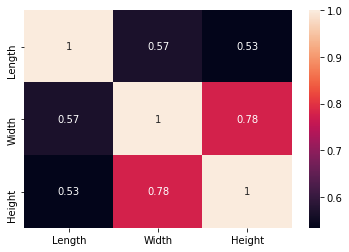

In [ ]:
import seaborn as sns

df_cor = df.corr()
sns.heatmap(df_cor, xticklabels = df_cor.columns, 
            yticklabels = df_cor.columns, annot=True)